In [10]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [48]:
img_bgr = cv2.imread('lenna.jpg')
height, width, channel = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY) 
img_lbp = np.zeros((height, width,3), np.uint8)

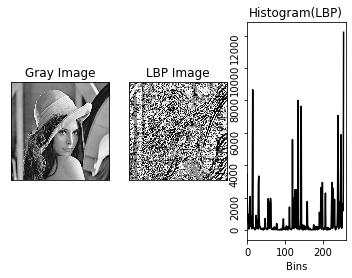

In [62]:
#LBP
def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value


def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y))       # top
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val    


def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure()
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        if current_type == "gray":
            current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color = "black")
            current_plot.set_xlim([0,260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)            
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list,rotation = 90)

    plt.show()


for i in range(0, height):
    for j in range(0, width):
         img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
output_list = []
output_list.append({
    "img": img_gray,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "Gray Image",
    "type": "gray"        
})
output_list.append({
    "img": img_lbp,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "LBP Image",
    "type": "gray"
})    
output_list.append({
    "img": hist_lbp,
    "xlabel": "Bins",
    "ylabel": "Number of pixels",
    "xtick": None,
    "ytick": None,
    "title": "Histogram(LBP)",
    "type": "histogram"
})

show_output(output_list)

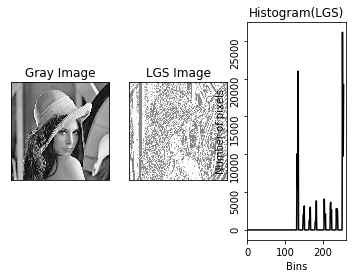

In [61]:
#LGS
def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value


def lbp_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y))         # origin
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x-1, y+2))     # top_right
    val_ar.append(get_pixel(img, center, x+1, y+2))     # bottom_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right again
    val_ar.append(get_pixel(img, center, x, y))         # origin again

    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val    

def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure()
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        if current_type == "gray":
            current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color = "black")
            current_plot.set_xlim([0,260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)            
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list,rotation = 90)

    plt.show()


for i in range(0, height):
    for j in range(0, width):
         img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

hist_lgs = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
output_list = []
output_list.append({
    "img": img_gray,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "Gray Image",
    "type": "gray"        
})
output_list.append({
    "img": img_lbp,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "LGS Image",
    "type": "gray"
})    
output_list.append({
    "img": hist_lgs,
    "xlabel": "Bins",
    "ylabel": "Number of pixels",
    "xtick": None,
    "ytick": None,
    "title": "Histogram(LGS)",
    "type": "histogram"
})

show_output(output_list)

In [8]:
#ELGS
#historigram combiner donc pas vraiment besoin de code

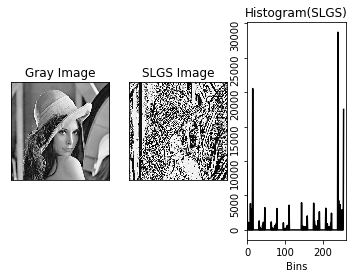

In [60]:
#SLGS
def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value


def slgs_calculated_pixel(img, x, y):
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y-2))     # top_left
    val_ar.append(get_pixel(img, center, x+1, y-2))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))       # left again
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x-1, y+2))     # top_right
    val_ar.append(get_pixel(img, center, x+1, y+2))     # bottom_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right again
    
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val    

def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure()
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        if current_type == "gray":
            current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color = "black")
            current_plot.set_xlim([0,260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)            
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list,rotation = 90)

    plt.show()


for i in range(0, height):
    for j in range(0, width):
         img_lbp[i, j] = slgs_calculated_pixel(img_gray, i, j)

hist_slgs = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
output_list = []
output_list.append({
    "img": img_gray,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "Gray Image",
    "type": "gray"        
})
output_list.append({
    "img": img_lbp,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "SLGS Image",
    "type": "gray"
})    
output_list.append({
    "img": hist_slgs,
    "xlabel": "Bins",
    "ylabel": "Number of pixels",
    "xtick": None,
    "ytick": None,
    "title": "Histogram(SLGS)",
    "type": "histogram"
})

show_output(output_list)